<a href="https://colab.research.google.com/github/7rdudd/dhvmsthtm/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the Fashion MNIST dataset

In [ ]:
# 오토인코더의 구현
import numpy as np  #연산을 위한 numpy 호출
import matplotlib.pyplot as plt #Matplotlib : 이미지 출력을 돕는 모듈 (시각화 결과물을 보이기 위해 호출)
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data() #MNIST 읽어 들이기(내장 데이터셋 호출을 위한 함수 호출)
print(x_train.shape, x_test.shape) #28*28의 손으로 쓴 문자 이미지가 6만 장

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


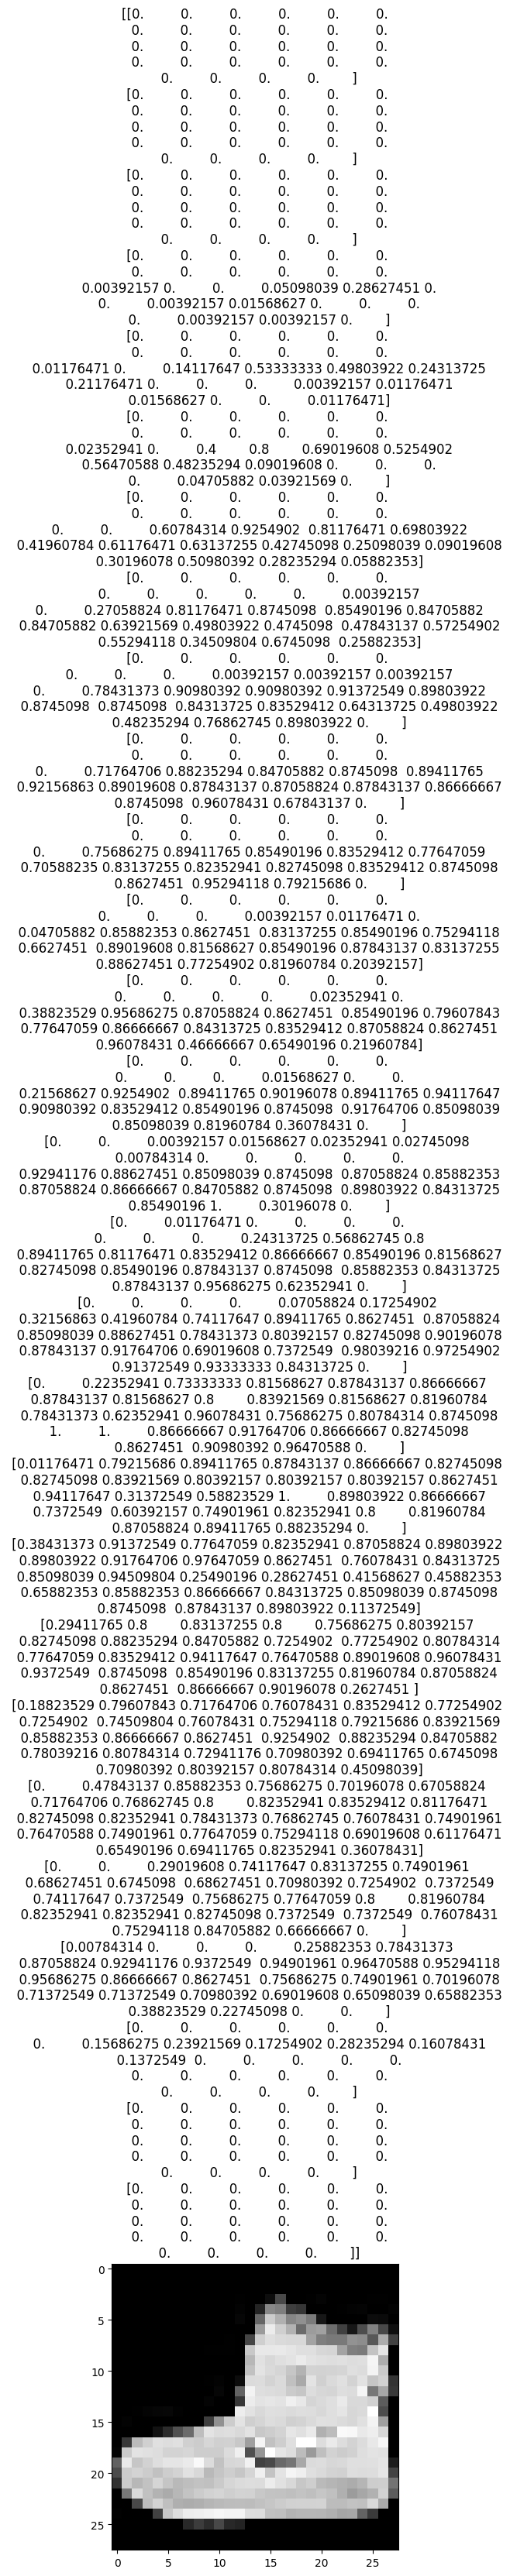

In [ ]:
#각 픽셀의 값을 0-1 범위에 넣는다
x_train= x_train/255 #픽셀의 색상값이 0~255이므로 모델이 인식하는 0부터 1사이의 값으로 만들기 위해 255로 나눠준다.
x_test= x_test/255

#손으로 쓴 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28,28),cmap="gray") #28*28 사이즈의 이미지
plt.title(x_train[0])
plt.show()

In [ ]:
#1차원으로 변환한다
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print("훈련용 데이터의 형태:", x_train.shape, "테스트용 데이터의 형태",x_test.shape)

#원래 이미지는 28x28 형태이지만 일렬로 펼쳐서 784개 원소를 가진 벡터로 만든다. 

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태 (10000, 784)


#설정

In [ ]:
epochs = 20        #현재 data를 얼마나 반복할 것인지
batch_size = 128   #한 스텝당 얼마나 학습시킬지
n_in_out = 784     # 입출력층의 뉴런 수
n_mid = 64         # 중간층의 뉴런 수

##오토인코더 모델 구현

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


#각 층
x = Input(shape=(n_in_out,)) # 입력
encoder = Dense(n_mid, activation= "relu") # Encoder
decoder = Dense(n_in_out, activation="sigmoid") #Decoder # 픽셀당 0과 1 사이로 값을 출력하는 sigmoid()함수

In [ ]:
#망
h=encoder(x)
y=decoder(h)

#오토인코더의모델
model_autoecoder = Model(x,y)
model_autoecoder.compile(optimizer= "adam",loss="binary_crossentropy") # 모델 compile 
model_autoecoder.summary()
print()

 # Adam()을 최적화함수로 사용한다.
 #Adam은 SGD의 변형함수이며 학습중인 기울기를 참고하여 학습 속도를 자동으로 변화시킨다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________



In [ ]:
#Encoder만의 모델
model_encoder= Model(x,h)
model_encoder.summary()
print()

#Decoder만의 모델
input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params

#학습

In [ ]:
model_autoecoder.fit(x_train, x_train,
                     shuffle=True,
                     epochs=epochs,
                     batch_size=batch_size,
                     validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 7s 4ms/step - loss: 0.3558 - val_loss: 0.3086
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2959 - val_loss: 0.2906
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2848 - val_loss: 0.2840
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2800 - val_loss: 0.2808
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2774 - val_loss: 0.2786
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2757 - val_loss: 0.2773
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2745 - val_loss: 0.2763
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2736 - val_loss: 0.2754
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2729 - val_loss: 0.2749
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2724 - val_loss: 0.2747

#생성결과(시각화)

313/313 [==============================] - 0s 1ms/step


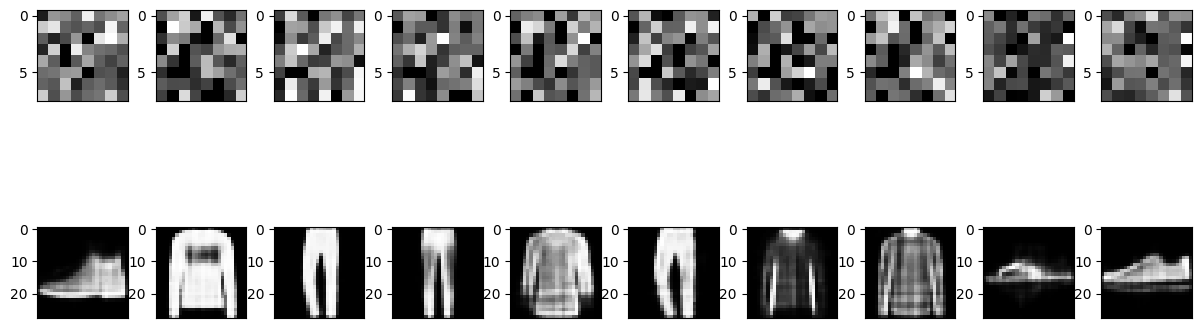

In [ ]:
encoded = model_encoder.predict(x_test)
decoded = model_decoder.predict(encoded)

n=10 #표시할 이미지 수
plt.figure(figsize=(15,4))
for i in range(n):
  #입력 이미지
  ax= plt.subplot(3, n, i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)
  #중간층의 출력
  ax= plt.subplot(3, n, i+1)
  plt.imshow(encoded[i].reshape(8,8),cmap="Greys_r") # 이미지 크기는 중간층의 뉴런 수에 맞춰서 변경한다.
  ax.get_xaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)
  #출력 이미지
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded[i].reshape(28,28),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)

plt.show()

 > * 효율적인 압축을 위해 희소성을 추가해주는 방법
  * Tensorflow에서 regularization을 적용하여 학습할 수 있음
  * 이전 모델과 비슷하지만, 인코딩된 표현의 sparsity(희소성)만 차이남

In [ ]:

# encoding dimension
encoding_dim = 32
 
input_img = Input(shape=(784,)) # 28*28
encoded = Dense(encoding_dim, activation='relu',
               kernel_regularizer=tf.keras.regularizers.l1(10e-5))(input_img) #kernel_regularizer를 Dense layer에 추가
decoded = Dense(784, activation='sigmoid')(encoded)
 
# autoencoder
autoencoder = Model(input_img, decoded)
 
# encoder
encoder = Model(input_img, encoded)
 
# decoder
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))
 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # 모델 compile 
autoencoder.fit(x_train, x_train,  # 모델 학습 진행
                batch_size=256, epochs=100, 
                validation_data=(x_test,x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.4735 - val_loss: 0.3949
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3719 - val_loss: 0.3583
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3469 - val_loss: 0.3416
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3347 - val_loss: 0.3335
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3285 - val_loss: 0.3282
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3247 - val_loss: 0.3253
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3221 - val_loss: 0.3230
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3201 - val_loss: 0.3212
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3184 - val_loss: 0.3196
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3170 - val_lo

313/313 [==============================] - 0s 1ms/step


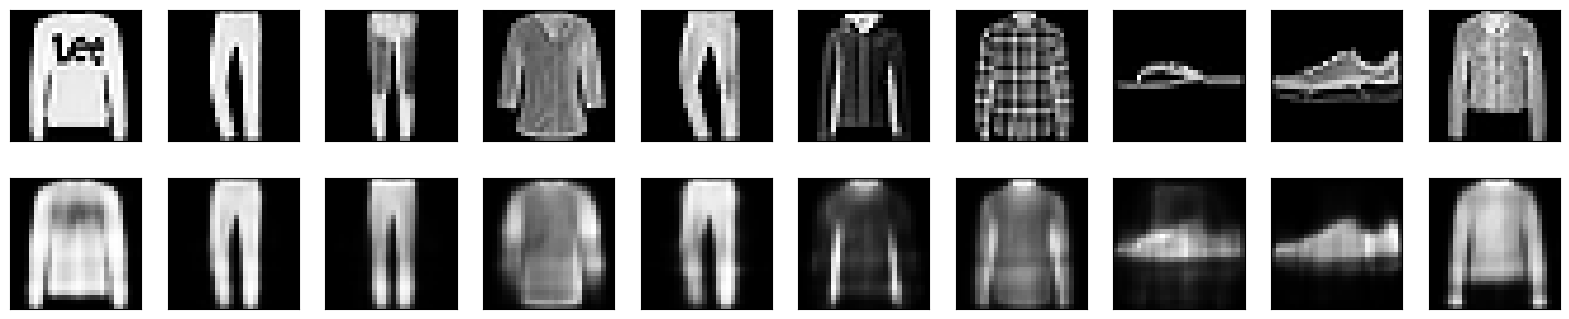

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
 
n = 10  # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs.mean()

0.8348139

> * 좀 더 Deep한 autoencoder 모델 사용
 * 인코더나 디코더 같은 단일 layer에 제한 x
 *layer 스택 사용

In [ ]:
# encoding dimension
encoding_dim = 32
 
input_img = Input(shape=(784,)) # 28*28
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
 
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
 
# autoencoder
autoencoder = Model(input_img, decoded)
 
# encoder
encoder = Model(input_img, encoded)
 
# decoder
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[4](encoded_input)
decoded_layer = autoencoder.layers[5](decoded_layer)
decoded_layer = autoencoder.layers[6](decoded_layer)
decoder = Model(encoded_input, decoded_layer)
 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, 
                batch_size=256, epochs=100, 
                validation_data=(x_test,x_test))

Epoch 1/100
235/235 [==============================] - 5s 6ms/step - loss: 0.3846 - val_loss: 0.3197
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3116 - val_loss: 0.3084
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3027 - val_loss: 0.3015
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2973 - val_loss: 0.2978
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2940 - val_loss: 0.2955
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2913 - val_loss: 0.2925
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2894 - val_loss: 0.2913
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2880 - val_loss: 0.2894
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2867 - val_loss: 0.2882
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2857 - val_lo

313/313 [==============================] - 1s 2ms/step


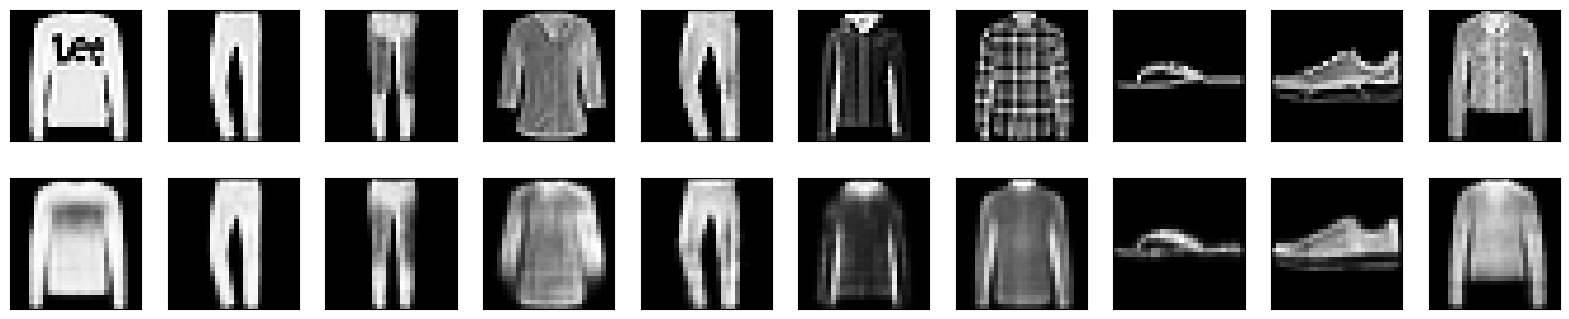

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
 
n = 10  # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs.mean()

5.953731

> * Convolutional autoencoder
 * train loss, val loss 그래프로 표현 가능
 

In [ ]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
input_img = Input(shape=(28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용
                                      #입력이 (28, 28, 1)의 차원을 가지므로, 데이터의 차원을 변경해준다
  
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#인코더는 Conv2D와 MaxPooling2D로 구성
# encoder의 shape = (samples, 4, 4, 8) 즉, 128차원
 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#디코더는 Conv2D와 UpSampling2D로 구성
# decoder의 shape = (sampels, 28, 28, 1)
 
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
 
encoder = Model(input_img, encoded)
 
decoded_input = Input(shape=(4,4,8))
decoded_layer = autoencoder.layers[7](decoded_input)
for i in range(8,len(autoencoder.layers)):
    decoded_layer = autoencoder.layers[i](decoded_layer)
decoder = Model(decoded_input, decoded_layer)
 
#모델 훈련 과정을 시각화 
from tensorflow.keras.callbacks import TensorBoard
autoencoder.fit(x_train, x_train, 
                batch_size=256, epochs=100, 
                validation_data=(x_test,x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
235/235 [==============================] - 11s 13ms/step - loss: 0.3828 - val_loss: 0.3220
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3131 - val_loss: 0.3097
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3048 - val_loss: 0.3048
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3007 - val_loss: 0.3010
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2981 - val_loss: 0.2996
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2962 - val_loss: 0.2983
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2946 - val_loss: 0.2962
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2934 - val_loss: 0.2946
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2923 - val_loss: 0.2941
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2914 - val_

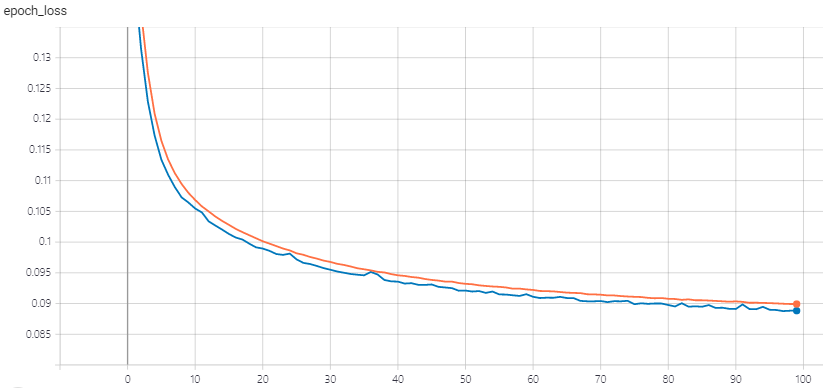

313/313 [==============================] - 1s 2ms/step


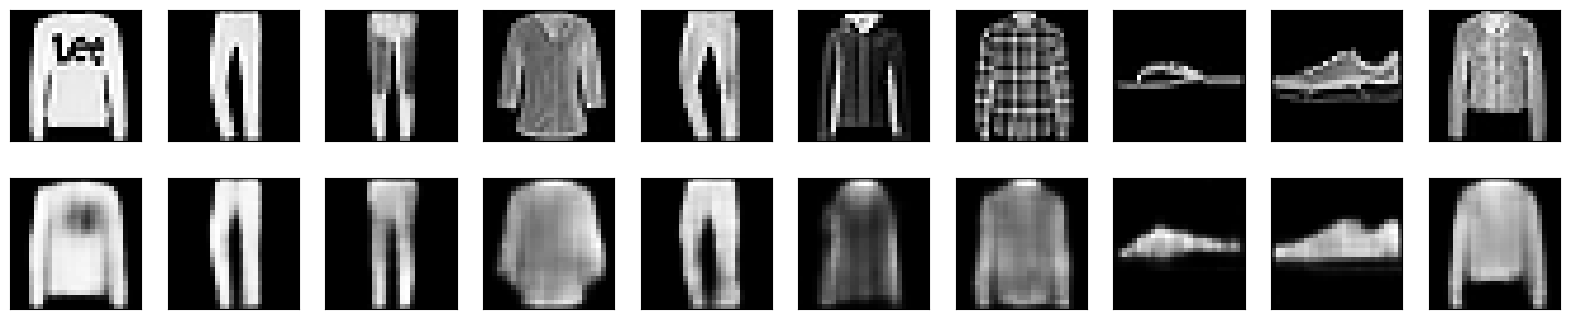

In [ ]:
#재구성된 데이터 결과 출력

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
 
n = 10  # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

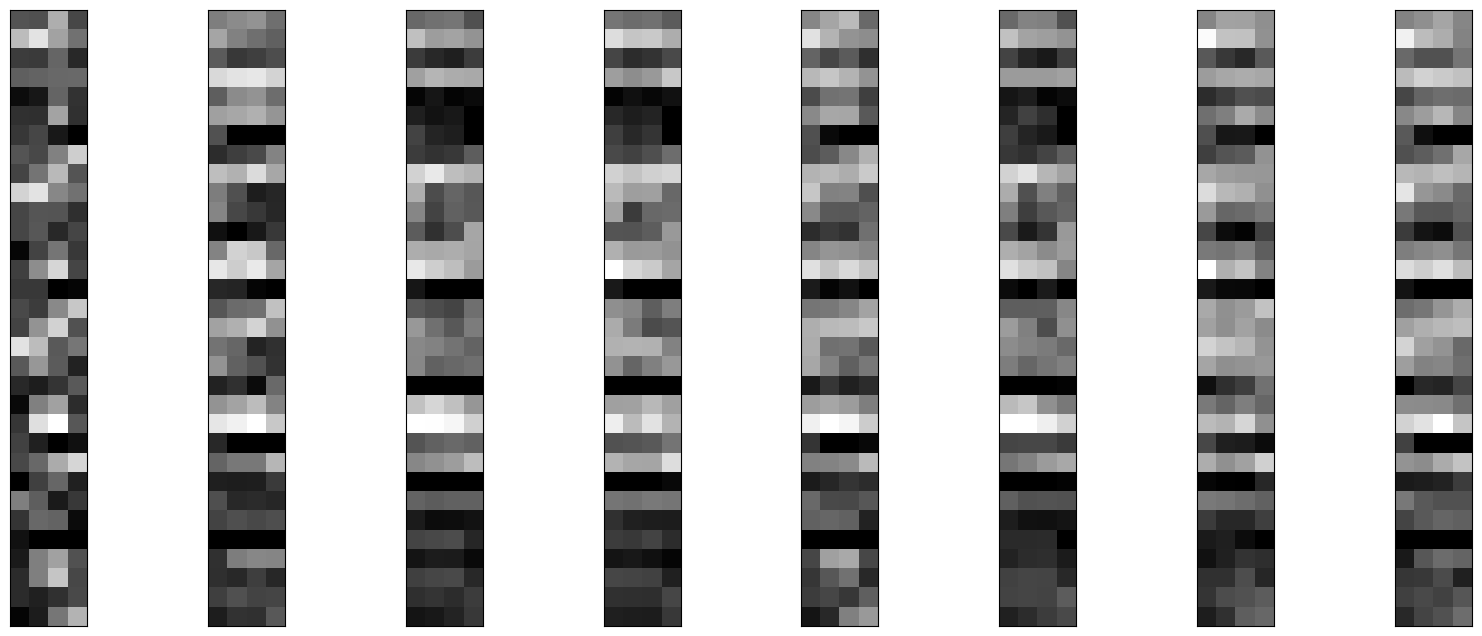

In [ ]:
#128차원의 인코딩된 데이터 결과 출력
#이 표현은 8x4x4이기 때문에 그레이스케일 이미지에서 나타내기 위해 4x32로 reshape

n = 8
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

> * 응용) 이미지 노이즈 제거
 *  이전의 Convolutional autoencoder를 조금 변형
 *재구성된 이미지의 질을 향상시키기 위해 layer당 더 많은 필터 사용


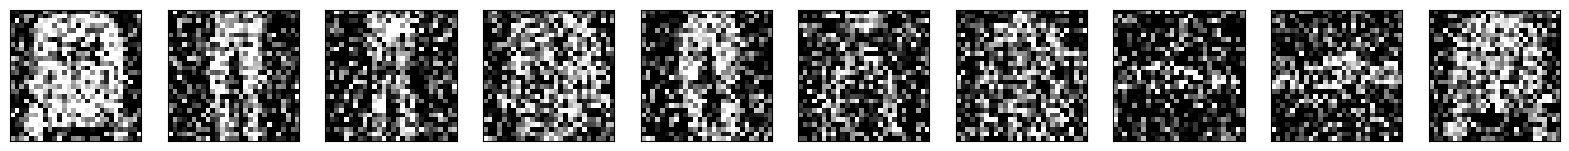

In [ ]:
#원본 데이터에 가우스 노이즈 행렬을 적용해, 노이지한 사진으로 합성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
 
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용
 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
 
# encoder의 shape = (samples, 4, 4, 8)
 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
 
# decoder의 shape = (sampels, 28, 28, 1)
 
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
 
encoder = Model(input_img, encoded)
 
decoded_input = Input(shape=(7,7,32))
decoded_layer = autoencoder.layers[5](decoded_input)
for i in range(6,len(autoencoder.layers)):
    decoded_layer = autoencoder.layers[i](decoded_layer)
decoder = Model(decoded_input, decoded_layer)
 
autoencoder.fit(x_train_noisy, x_train, 
                batch_size=256, epochs=100, 
                validation_data=(x_test_noisy,x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=False)])


Epoch 1/100
235/235 [==============================] - 5s 12ms/step - loss: 0.3562 - val_loss: 0.3172
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.3105 - val_loss: 0.3106
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3055 - val_loss: 0.3072
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3030 - val_loss: 0.3041
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3010 - val_loss: 0.3028
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2996 - val_loss: 0.3016
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2984 - val_loss: 0.3006
Epoch 8/100
235/235 [==============================] - 2s 11ms/step - loss: 0.2973 - val_loss: 0.2993
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2964 - val_loss: 0.2984
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.295

생성 결과

313/313 [==============================] - 1s 2ms/step


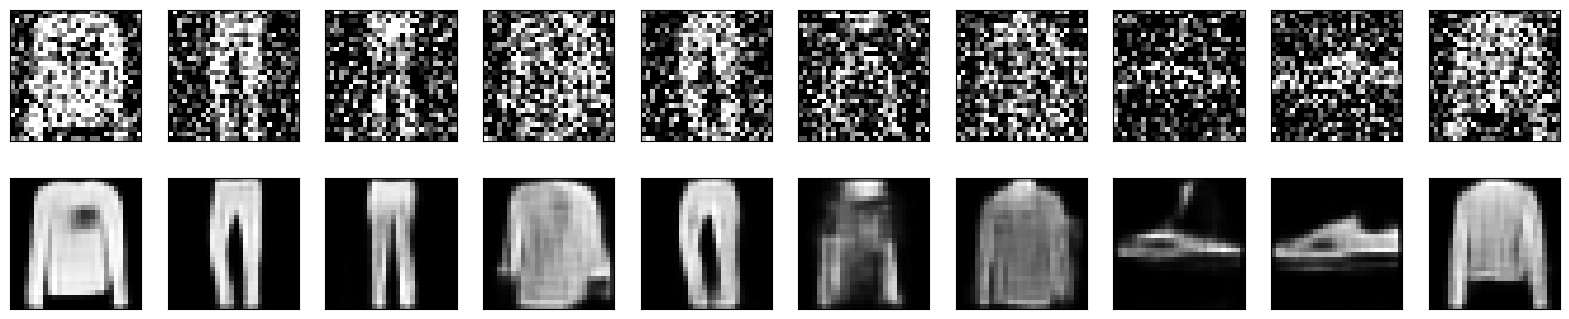

In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)
 
n = 10  # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs.mean()